In [ ]:
pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.54.0
    Uninstalling 

In [ ]:
%%capture
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN

In [ ]:
Y_df = pd.read_csv('/content/Merged File PM2-5.csv')

In [ ]:
Y_df = Y_df.drop('Unnamed: 0' ,axis=1)

In [ ]:
Y_df.isnull().sum()

Date       0
54T     1683
36T     1034
30T     1067
24T     1468
        ... 
94T     4202
95T     4202
96T     4182
97T     4206
98T     4206
Length: 104, dtype: int64

In [ ]:
Y_df

,Date,54T,36T,30T,24T,44T,27T,40T,61T,26T,...,99T,103T,101T,102T,100T,94T,95T,96T,97T,98T
0,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2022-12-27,36.0,33.0,45.0,46.0,23.0,46.0,21.0,28.0,45.0,...,32.0,42.0,24.0,11.0,27.0,35.0,43.0,44.0,30.0,38.0
4379,2022-12-28,42.0,32.0,48.0,43.0,26.0,56.0,23.0,30.0,51.0,...,31.0,40.0,20.0,11.0,22.0,34.0,36.0,41.0,29.0,39.0
4380,2022-12-29,43.0,31.0,47.0,34.0,26.0,49.0,21.0,29.0,46.0,...,28.0,38.0,13.0,12.0,26.0,30.0,36.0,45.0,26.0,36.0
4381,2022-12-30,27.0,31.0,33.0,23.0,27.0,32.0,20.0,20.0,40.0,...,17.0,41.0,17.0,12.0,14.0,26.0,28.0,37.0,22.0,28.0


In [ ]:
Y_df['unique_id'] = 1.0

In [ ]:
Y_df = Y_df[['unique_id', 'Date', '35T']]

In [ ]:
Y_df.head()

,unique_id,Date,35T
0,1.0,2011-01-01,NaN
1,1.0,2011-01-02,NaN
2,1.0,2011-01-03,NaN
3,1.0,2011-01-04,NaN
4,1.0,2011-01-05,NaN


In [ ]:
Y_df.rename(columns = {'Date' : 'ds', '35T' : 'y'}, inplace = True)

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

In [ ]:
Y_df.dtypes

unique_id           float64
ds           datetime64[ns]
y                   float64
dtype: object

In [ ]:
Y_df = Y_df.dropna()
Y_df

,unique_id,ds,y
2018,1.0,2016-07-11,20.0
2019,1.0,2016-07-12,24.0
2020,1.0,2016-07-13,26.0
2021,1.0,2016-07-14,23.0
2022,1.0,2016-07-15,24.0
...,...,...,...
4378,1.0,2022-12-27,33.0
4379,1.0,2022-12-28,32.0
4380,1.0,2022-12-29,34.0
4381,1.0,2022-12-30,32.0


In [ ]:
Y_df = Y_df.reset_index()

In [ ]:
Y_df.columns

Index(['index', 'unique_id', 'ds', 'y'], dtype='object')

In [ ]:
Y_df = Y_df.drop(['index'] ,axis=1)

In [ ]:
Y_df

,unique_id,ds,y
0,1.0,2016-07-11,20.0
1,1.0,2016-07-12,24.0
2,1.0,2016-07-13,26.0
3,1.0,2016-07-14,23.0
4,1.0,2016-07-15,24.0
...,...,...,...
2288,1.0,2022-12-27,33.0
2289,1.0,2022-12-28,32.0
2290,1.0,2022-12-29,34.0
2291,1.0,2022-12-30,32.0


In [ ]:
Y_train_df = Y_df.loc[Y_df['ds'] <= '2022-07-11']
Y_test_df = Y_df.loc[Y_df['ds'] > '2022-07-11']

In [ ]:
len(Y_test_df)

151

In [ ]:
len(Y_train_df)

2142

In [ ]:
Y_train_df.tail()

,unique_id,ds,y
2137,1.0,2022-07-07,9.0
2138,1.0,2022-07-08,11.0
2139,1.0,2022-07-09,11.0
2140,1.0,2022-07-10,11.0
2141,1.0,2022-07-11,12.0


In [ ]:
#Y_train_df['ds'] = pd.to_datetime(Y_train_df['ds'])
#Y_train_df['ds'] = pd.to_datetime(Y_test_df['ds'])

In [ ]:
Y_test_df.isnull().sum()

unique_id    0
ds           0
y            0
dtype: int64

In [ ]:
# from neuralforecast.auto import AutoLSTM

In [ ]:
# %%capture
# # Use your own config or AutoLSTM.default_config
# config = dict(max_steps=2, val_check_steps=1, input_size=-1, encoder_hidden_size=8)
# model = AutoLSTM(h=12, num_samples=1, cpus=1)

# # Fit and predict
# model.fit(dataset=Y_train_df)
# y_hat = model.predict(dataset=Y_test_df)

In [ ]:
RNN(h=366,
              scaler_type='robust',
                encoder_n_layers=2,
                encoder_hidden_size=128,
                context_size=10,
                decoder_hidden_size=128,
                decoder_layers=2,
                max_steps=300)

In [ ]:
%%capture
horizon = len(Y_test_df)

# Try different hyperparmeters to improve accuracy.
models = [LSTM(h=366,                    # Forecast horizon
               max_steps=500,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=64,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=64,),     # Defines the number of hidden units of each layer of the MLP decoder
          NHITS(h=366,                   # Forecast horizon
                input_size=2 * horizon,      # Length of input sequence
                max_steps=100,               # Number of steps to train
                n_freq_downsample=[2, 1, 1]), # Downsampling factors for each stack output
          RNN(h=366,
              scaler_type='robust',
                encoder_n_layers=2,
                encoder_hidden_size=128,
                context_size=10,
                decoder_hidden_size=128,
                decoder_layers=2,
                max_steps=300)
          ]
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=Y_train_df)

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1


In [ ]:
Y_hat_df = nf.predict()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [ ]:
Y_hat_df = Y_hat_df.reset_index()
Y_hat_df.head()

,unique_id,ds,LSTM,NHITS,RNN
0,1.0,2022-07-12,13.160286,12.541824,14.386110
1,1.0,2022-07-13,14.122379,12.233478,13.399214
2,1.0,2022-07-14,13.671904,13.233364,14.717780
3,1.0,2022-07-15,13.445312,13.108472,14.231398
4,1.0,2022-07-16,14.133810,12.481308,14.338474


In [ ]:
Y_hat_df.tail()

,unique_id,ds,LSTM,NHITS,RNN
361,1.0,2023-07-08,12.792315,13.185015,13.879132
362,1.0,2023-07-09,13.509109,13.207841,13.897954
363,1.0,2023-07-10,13.265150,13.046392,14.008856
364,1.0,2023-07-11,13.098576,13.998458,14.070581
365,1.0,2023-07-12,13.339401,12.631309,13.704890


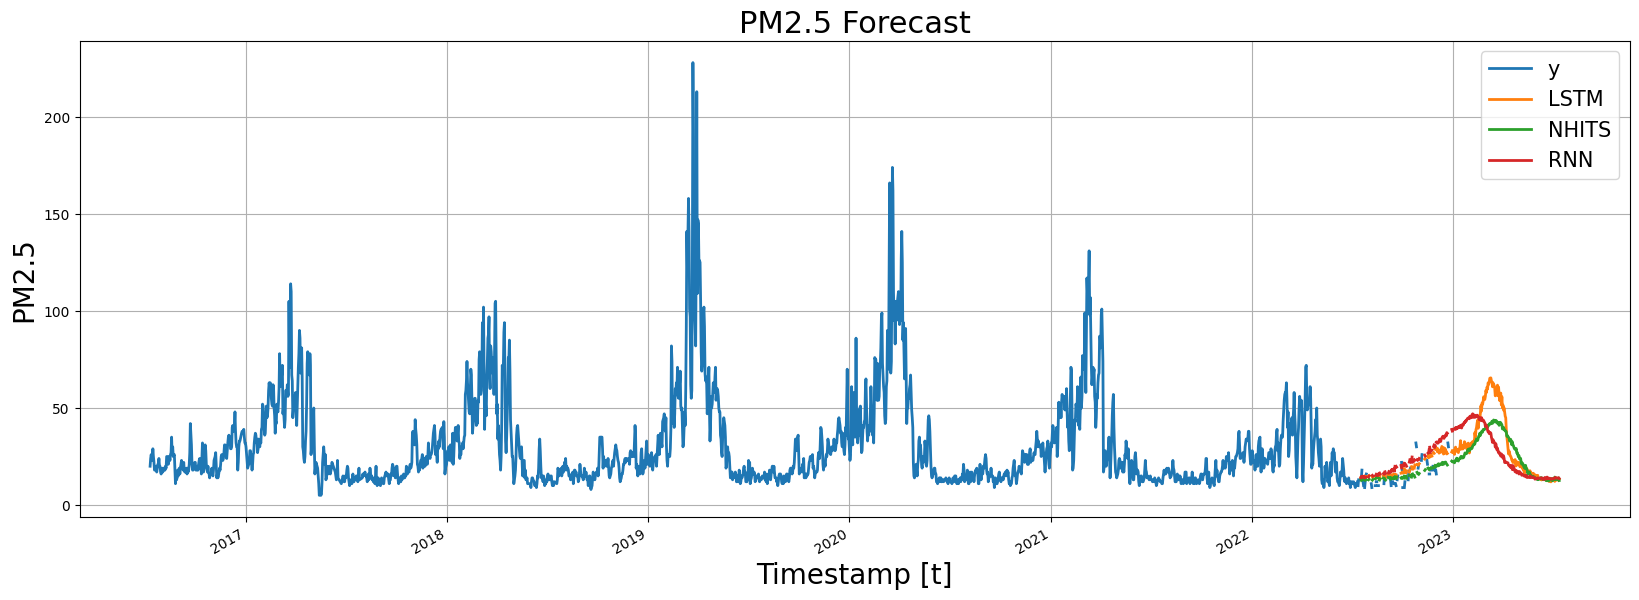

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS', 'RNN']].plot(ax=ax, linewidth=2)

ax.set_title('PM2.5 Forecast', fontsize=22)
ax.set_ylabel('PM2.5', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
# import unittest
# import torch as t 
# import numpy as np

# from neuralforecast.losses.pytorch import (
#     MAE, MSE, RMSE,      # unscaled errors
#     MAPE, SMAPE,         # percentage errors
#     MASE,                # scaled error
#     QuantileLoss, MQLoss # probabilistic errors
# )

# from neuralforecast.losses.numpy import (
#     mae, mse, rmse,              # unscaled errors
#     mape, smape,                 # percentage errors
#     mase,                        # scaled error
#     quantile_loss, mqloss        # probabilistic errors
# )

In [ ]:
# ! pip install statsforecast s3fs datasetsforecast

In [ ]:
# from datasetsforecast.losses import mse, mae, rmse
# from datasetsforecast.evaluation import accuracy

In [ ]:
# cv_df = nf.cross_validation(Y_df, n_windows=2)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [ ]:
# cv_df

,unique_id,ds,cutoff,LSTM,NHITS,RNN,y
0,1.0,2021-12-30,2021-12-29,23.511484,26.772375,22.403280,21.0
1,1.0,2021-12-31,2021-12-29,23.809242,26.808161,22.024414,22.0
2,1.0,2022-01-01,2021-12-29,24.331337,30.221373,21.343925,28.0
3,1.0,2022-01-02,2021-12-29,23.952274,30.429342,19.654705,22.0
4,1.0,2022-01-03,2021-12-29,24.582687,28.970091,20.482529,23.0
...,...,...,...,...,...,...,...
727,1.0,2022-12-27,2021-12-30,25.741072,33.009518,18.705803,33.0
728,1.0,2022-12-28,2021-12-30,26.001312,35.822067,17.906281,32.0
729,1.0,2022-12-29,2021-12-30,25.655869,34.170338,17.403440,34.0
730,1.0,2022-12-30,2021-12-30,26.359644,32.100773,18.436012,32.0


In [ ]:
# evaluation_df = accuracy(cv_df, [mse, mae, rmse])
# evaluation_df.head()

ERROR:root:_1 _State.RUNNING -> _State.FAILED  Invalid syntax: 'unique_id:double,metric:string,cutoff:timestamp[us],LSTM:double,NHITS:double,RNN:double' Expecting ',' delimiter: line 1 column 61 (char 60)


SchemaError: ignored

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# # Error metrics
# print(f'RMSE: {mean_squared_error(Y_test_df, Y_hat_df)}')
# print(f'MAPE: {mean_absolute_percentage_error(Y_test_df, Y_hat_df)}')

In [ ]:
nf.save(path='./checkpoints/neutralforecast_v1',
        model_index=None, 
        overwrite=True,
        save_dataset=True)

In [ ]:
!zip -r /content/neutralforecastv1.zip /content/checkpoints

  adding: content/checkpoints/ (stored 0%)
  adding: content/checkpoints/neutralforecast_v1/ (stored 0%)
  adding: content/checkpoints/neutralforecast_v1/rnn_0.ckpt (deflated 8%)
  adding: content/checkpoints/neutralforecast_v1/configuration.pkl (deflated 36%)
  adding: content/checkpoints/neutralforecast_v1/dataset.pkl (deflated 67%)
  adding: content/checkpoints/neutralforecast_v1/lstm_0.ckpt (deflated 8%)
  adding: content/checkpoints/neutralforecast_v1/nhits_0.ckpt (deflated 8%)


In [ ]:
!unzip /content/neutralforecastv1.zip -d /loaded_model

Archive:  /content/neutralforecastv1.zip
   creating: /loaded_model/content/checkpoints/
   creating: /loaded_model/content/checkpoints/neutralforecast_v1/
  inflating: /loaded_model/content/checkpoints/neutralforecast_v1/rnn_0.ckpt  
  inflating: /loaded_model/content/checkpoints/neutralforecast_v1/configuration.pkl  
  inflating: /loaded_model/content/checkpoints/neutralforecast_v1/dataset.pkl  
  inflating: /loaded_model/content/checkpoints/neutralforecast_v1/lstm_0.ckpt  
  inflating: /loaded_model/content/checkpoints/neutralforecast_v1/nhits_0.ckpt  
